In [1]:
from cube import cube
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    'figure.figsize': (10,10),
    'font.size': 18
})

%matplotlib widget

In [2]:
my_cube = cube()

In [3]:
my_cube.reset_state()


In [11]:
move_list = my_cube.get_move_list()

to_move = move_list[0] + " " + move_list[5] + " " + move_list[6] + " " + move_list[9]

print(to_move)

prospective_state = my_cube.string_operation(to_move, False)
print(prospective_state)
print(my_cube.get_moved_set())

F B2 U D
None
['F', 'B', 'B', 'U', 'D']


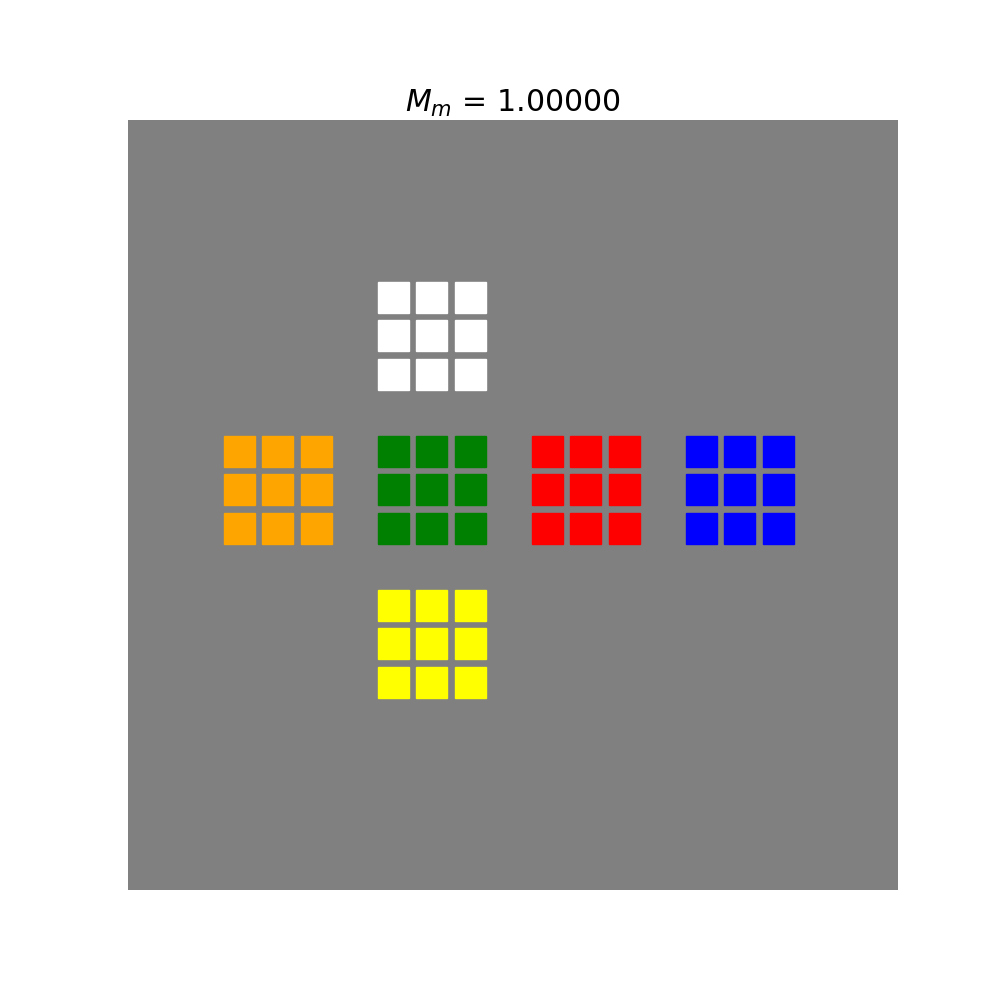

In [5]:
fig = plt.figure(1)

ax = fig.add_subplot()

my_cube.visualise_state(ax)

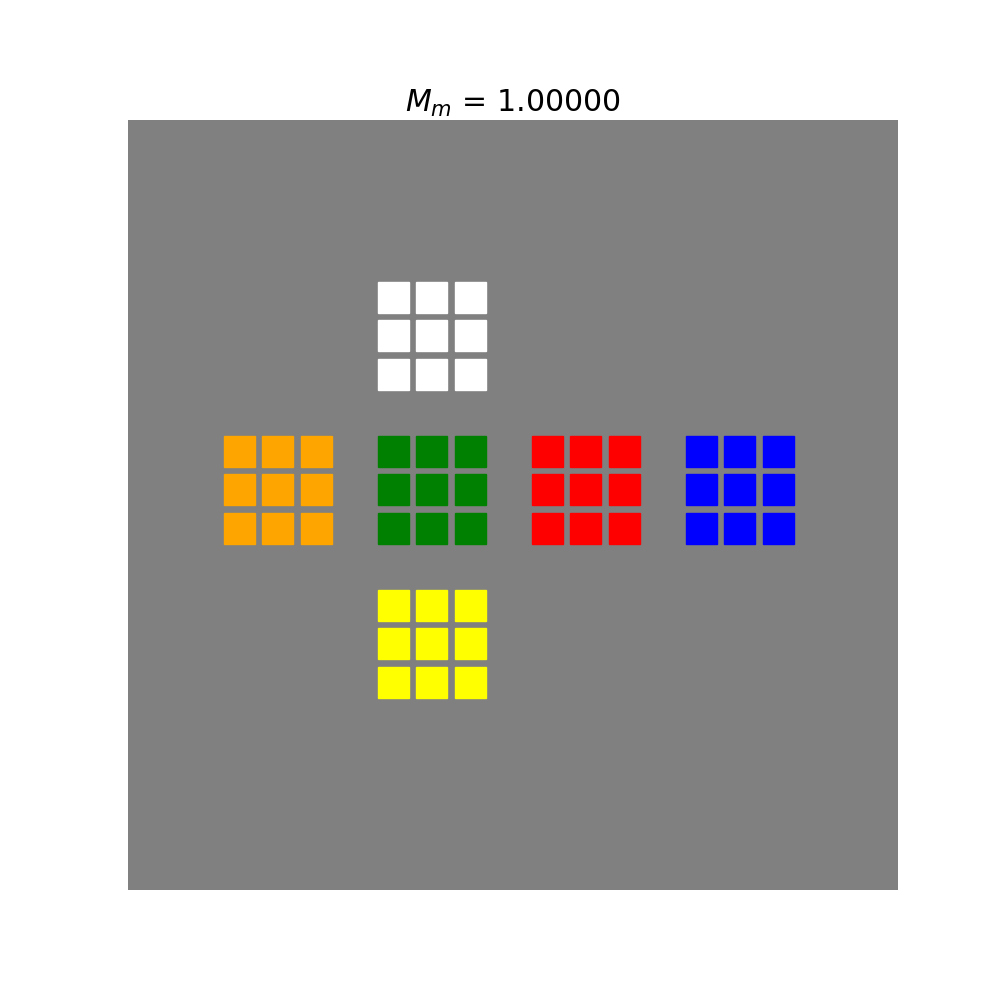

In [3]:
my_cube.button_operation()

In [5]:
print(my_cube.get_move_set())

['F', 'U', 'R', 'U', "F'", "R'", 'U']
